In [2]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

EPSILON = 1e-20

### Problem 1

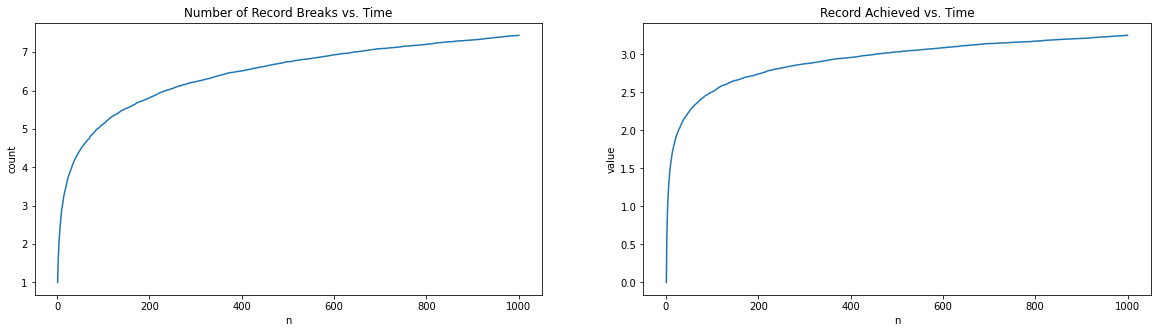

In [89]:
T = 1000
n = 1000

N_sum, R_sum = np.zeros(n+1), np.zeros(n+1)

for t in range(T):
    X = np.random.randn(n+1)
    N, R = np.zeros(n+1), np.zeros(n+1)
    N[0], R[0] = 0, -np.inf
    for i in range(1, n+1):
        R[i] = max(R[i-1], X[i])
        N[i] = N[i-1] + (1 if R[i-1] < X[i] else 0)
    N_sum += N
    R_sum += R

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
I = range(1, n+1)
axs[0].plot(I, N_sum[I] / T)
axs[0].set_title('Number of Record Breaks vs. Time')
axs[0].set_xlabel('n')
axs[0].set_ylabel('count')

axs[1].plot(I, R_sum[I] / T)
axs[1].set_title('Record Achieved vs. Time')
axs[1].set_xlabel('n')
axs[1].set_ylabel('value')
plt.show()

### Problem 2

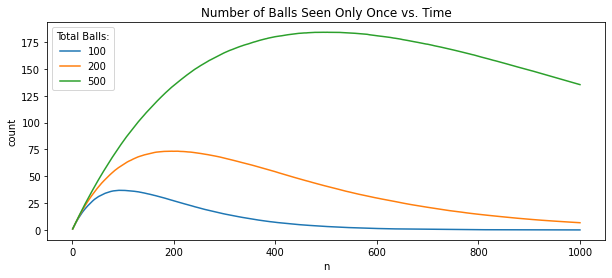

In [88]:
T = 1000
n = 1000

plt.figure(figsize=(10, 5))

for m in [100, 200, 500]:
    N_sum = np.zeros(n)
    for t in range(T):
        samples = np.random.choice(range(m), n, replace=True)
        counts = np.zeros(m)
        N = np.zeros(n)
        for i in range(n):
            counts[samples[i]] += 1
            N[i] = np.count_nonzero(counts == 1)
        N_sum += N

    plt.plot(range(1, n+1), N_sum / T, label=str(m))

plt.legend(title='Total Balls:')
plt.title('Number of Balls Seen Only Once vs. Time')
plt.xlabel('n')
plt.ylabel('count')
plt.show()

### Problem 3

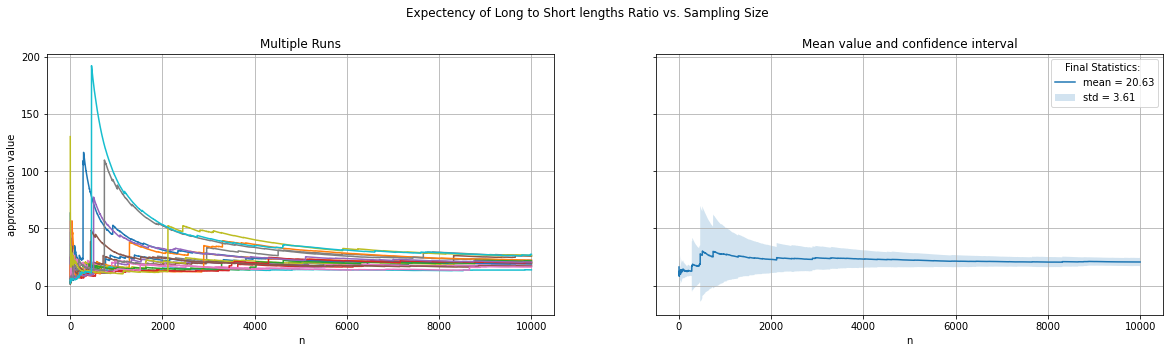

In [87]:
n = 10000
T = 20

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), sharey='all')
results = pd.DataFrame()

for t in range(T):
    R = np.zeros(n)
    X = np.random.rand(n).reshape(-1, 1)
    Y = np.concatenate([X, 1-X], axis=1)
    R = Y.max(axis=1) / Y.min(axis=1)
    Exp_R = np.cumsum(R) / np.arange(1, n+1)
    axs[0].plot(range(1, n+1), Exp_R, label=str(t+1))
    results[t] = Exp_R

fig.subplots_adjust(top=0.85)
fig.suptitle('Expectency of Long to Short lengths Ratio vs. Sampling Size')

axs[0].set_title("Multiple Runs")
axs[0].set_xlabel("n")
axs[0].set_ylabel("approximation value")
axs[0].grid()

results_mean, results_std = results.mean(axis=1), results.std(axis=1)
axs[1].set_title("Mean value and confidence interval")
axs[1].set_xlabel("n")
axs[1].plot(range(1, n+1), results_mean, label=f"mean = {results_mean.values[-1]:.2f}")
axs[1].fill_between(
    range(1, n+1),
    results_mean - results_std,
    results_mean + results_std,
    alpha=0.2,
    label=f"std = {results_std.values[-1]:.2f}"
)
axs[1].grid()
axs[1].legend(title='Final Statistics: ')

plt.show()

### Problem 4

### Problem 5